# TASK-1

In [1]:
#Header files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tsfel
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
%config InlineBackend.figure_format='retina'

## Q1

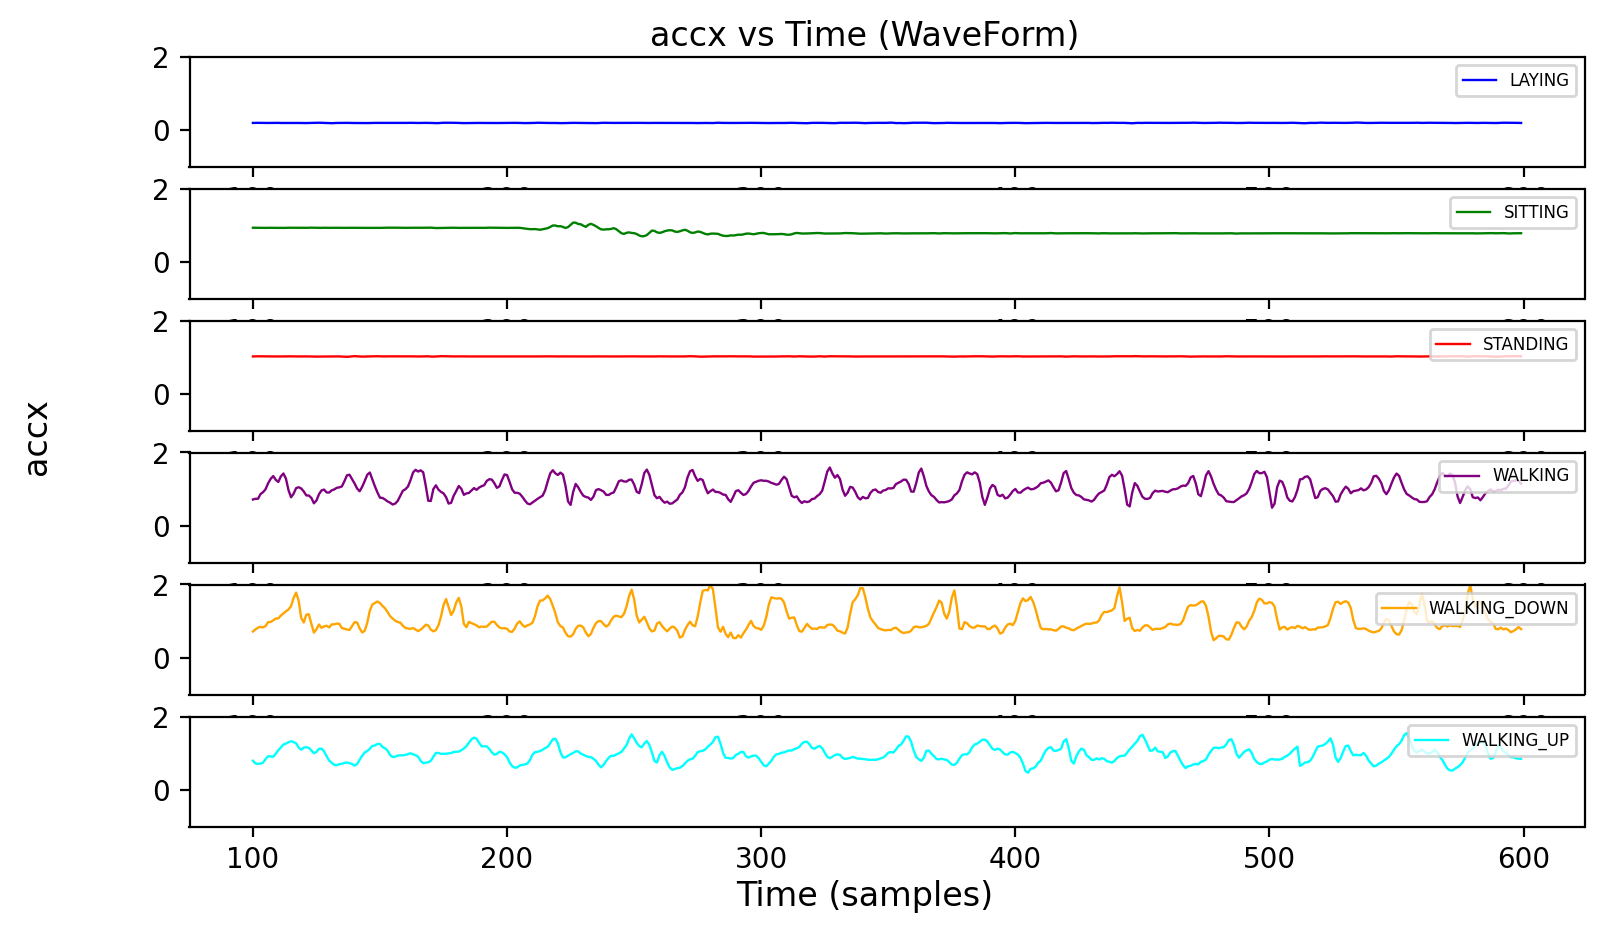

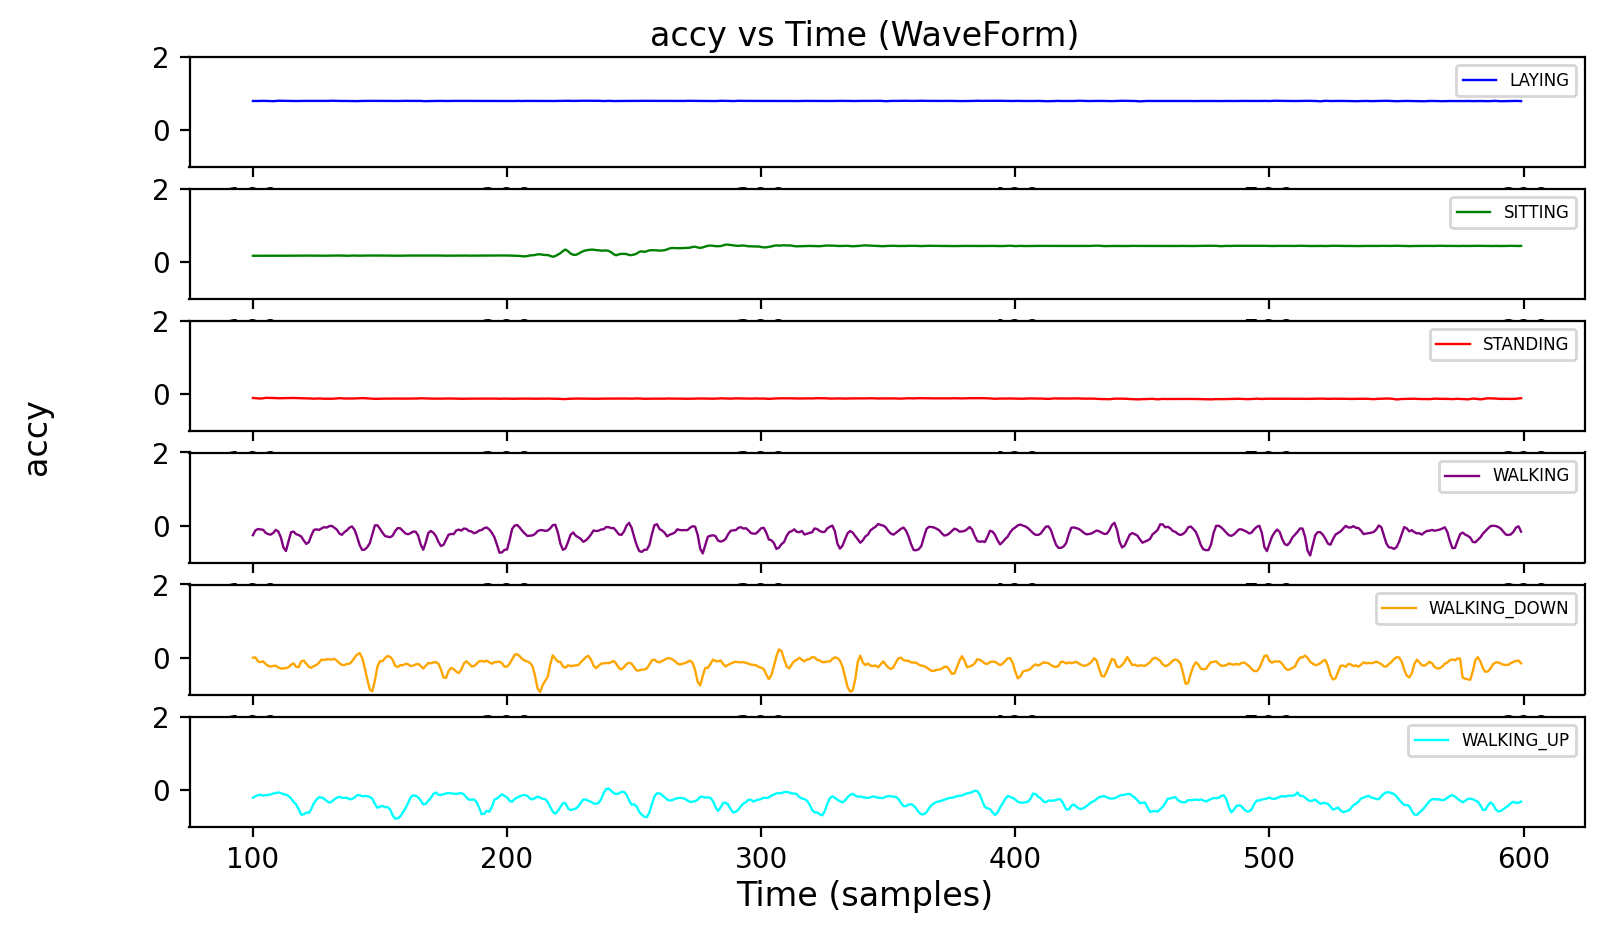

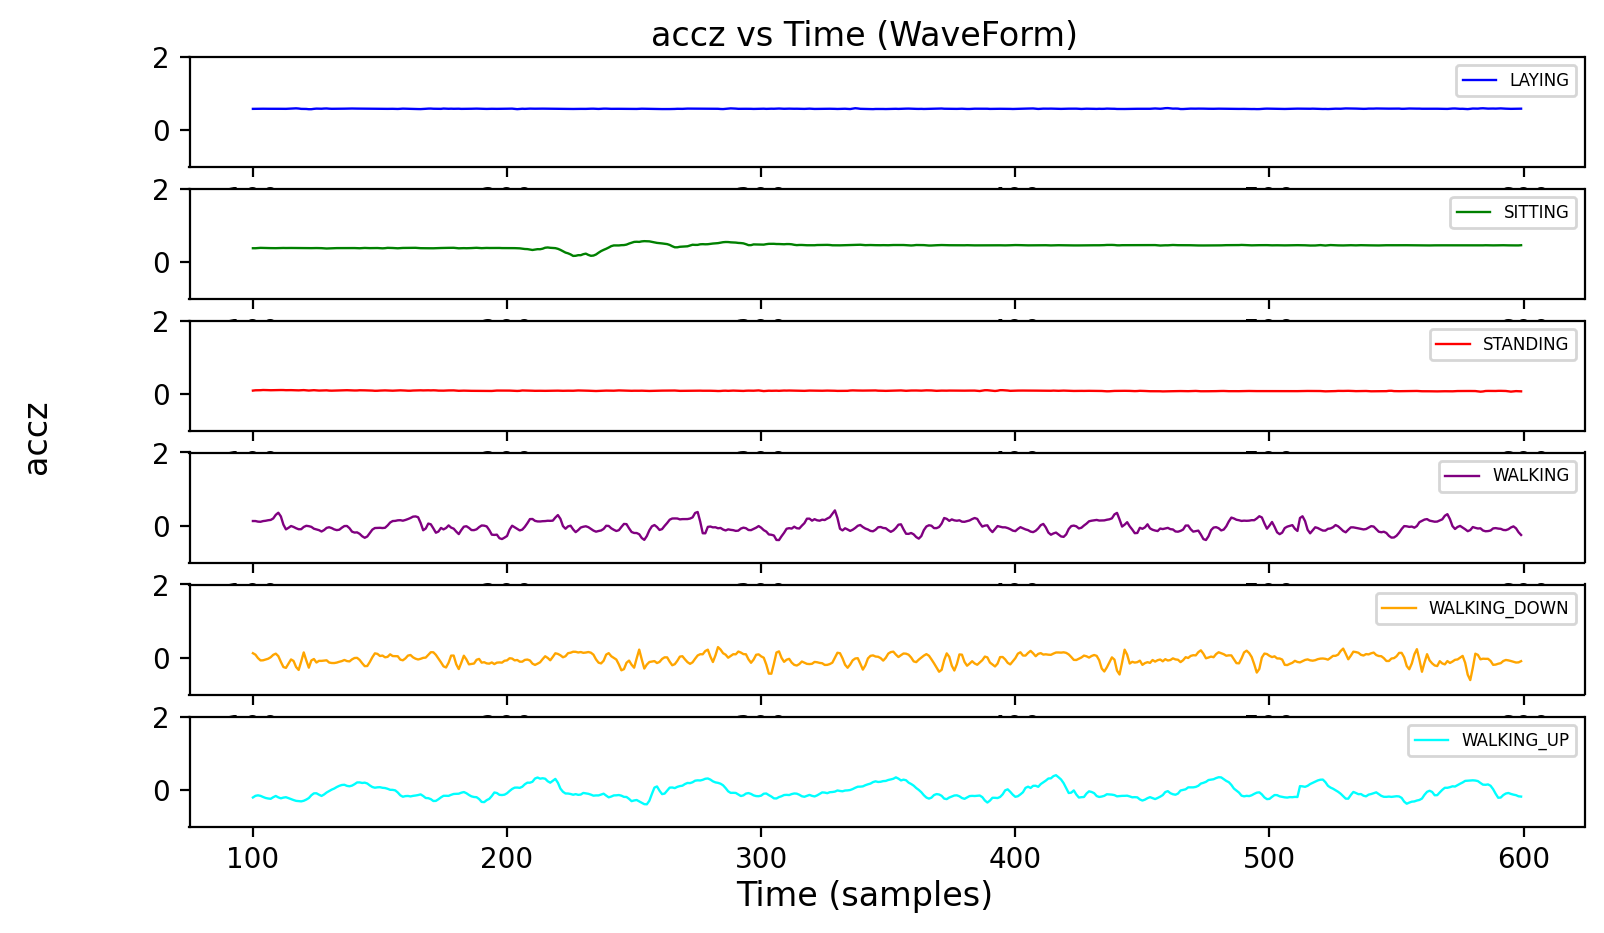

In [2]:

Laying_df = pd.read_csv('.\HAR\Combined\Train\LAYING\Subject_1.csv').iloc[100:600]
Sitting_df = pd.read_csv('.\HAR\Combined\Train\SITTING\Subject_1.csv').iloc[100:600]
Standing_df = pd.read_csv('.\HAR\Combined\Train\STANDING\Subject_1.csv').iloc[100:600]
Walking_df = pd.read_csv('.\HAR\Combined\Train\WALKING\Subject_1.csv').iloc[100:600]
WalkingDown_df = pd.read_csv('.\HAR\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv').iloc[100:600]
WalkingUp_df = pd.read_csv('.\HAR\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv').iloc[100:600]
# List of DataFrames
dfs = [Laying_df,Sitting_df,Standing_df,Walking_df,WalkingDown_df,WalkingUp_df]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWN','WALKING_UP']
for j, axis in enumerate(['accx', 'accy', 'accz']):
    fig, ax = plt.subplots(nrows=6, figsize=(9, 5))
    for i, df in enumerate(dfs):
        ax[i].plot(df[axis], label=f'{labels[i]}', lw=0.85,color = colors[i])
        ax[i].legend(loc='upper right',fontsize=6) 
        ax[i].set_ylim([-1, 2])
    fig.text(0.04, 0.5, f'{axis}', va='center', ha='center', rotation='vertical', fontsize=12)
    fig.text(0.5, 0.04, 'Time (samples)', va='center', ha='center', fontsize=12)
    fig.text(0.5, 0.9, f'{axis} vs Time (WaveForm)', va='center', ha='center', fontsize=12)
    plt.show()
    

Yes, It is possible for the model to classify models based on the data.

As you can see in the above plots, each action has a different pattern in the $acc_x,acc_y,acc_z$.
Though depending on our model parameters and settings, it might be a little difficult for the model to differentiate betweens labels like laying and sitting, standing and Walking and WalkingUp. 

## Q2

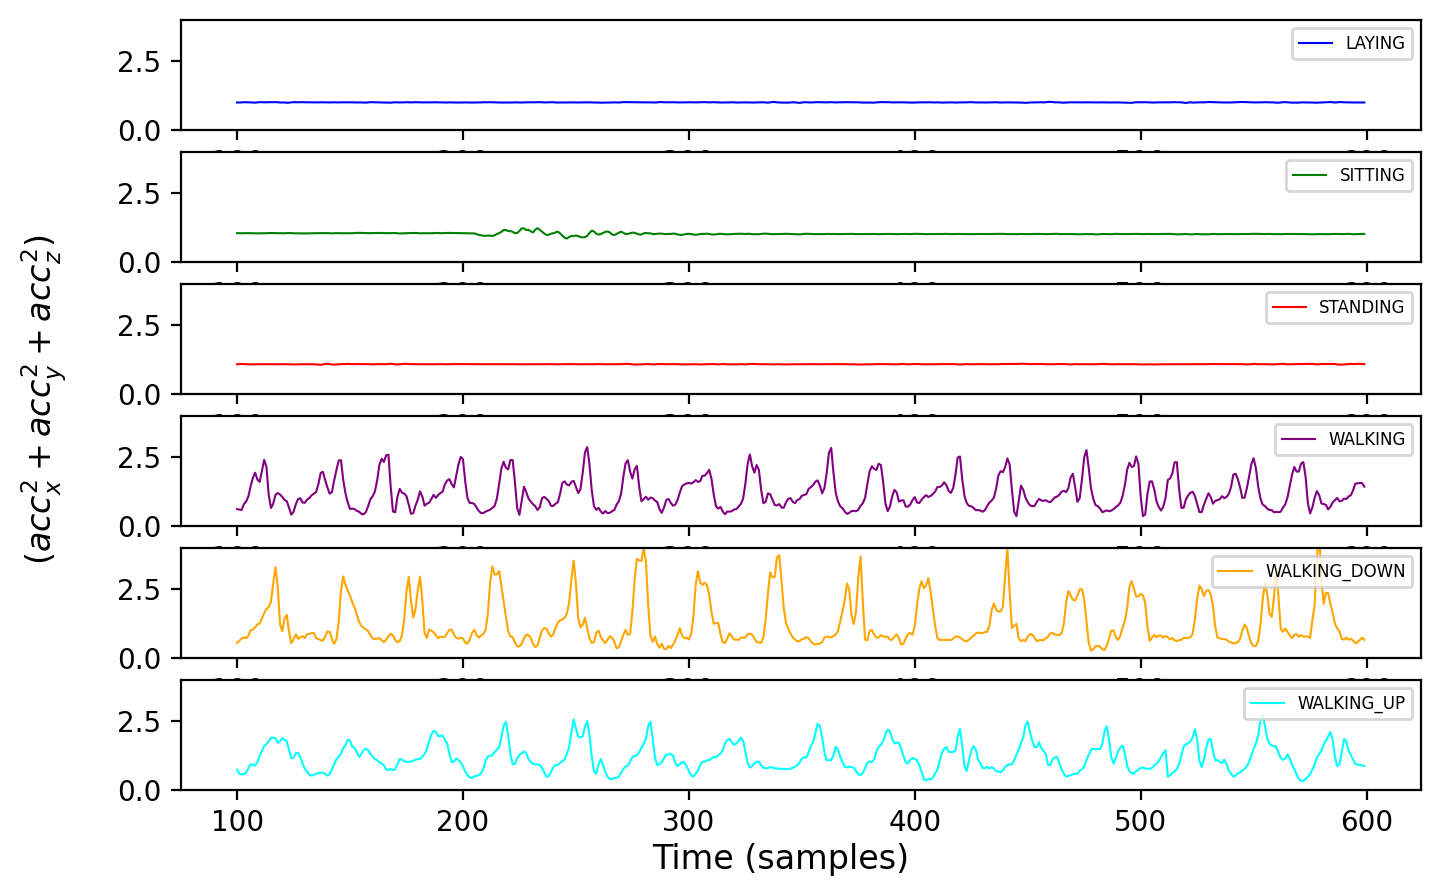

In [3]:


dfs = [Laying_df['accx']**2+Laying_df['accy']**2+Laying_df['accz']**2,
       Sitting_df['accx']**2+Sitting_df['accy']**2+Sitting_df['accz']**2
       ,Standing_df['accx']**2+Standing_df['accy']**2+Standing_df['accz']**2
       ,Walking_df['accx']**2+Walking_df['accy']**2+Walking_df['accz']**2
       ,WalkingDown_df['accx']**2+WalkingDown_df['accy']**2+WalkingDown_df['accz']**2
       ,WalkingUp_df['accx']**2+WalkingUp_df['accy']**2+WalkingUp_df['accz']**2]

labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWN','WALKING_UP']

fig, ax = plt.subplots(nrows=6, figsize=(8, 5))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, df in enumerate(dfs):
    ax[i].plot(df, label=f'{labels[i]}', lw=0.75,color = colors[i])
    ax[i].legend(loc='upper right',fontsize=6) 
    ax[i].set_ylim([0, 4]) 

# Shared y-label
fig.text(0.04, 0.5, '$(acc_x^2+acc_y^2+acc_z^2)$', va='center', ha='center', rotation='vertical', fontsize=12)
# Shared x-label
fig.text(0.5, 0.04, 'Time (samples)', va='center', ha='center', fontsize=12)
plt.show()

As you can see from the above data, it is quite possible to distinguish between between static and dynamic without a ML model. As long as the you set a variable that detects the fluctuation in the linear accelaration, it will be very clear whether it is static or dynamic. But to futher detect between the subclasses of static and dynamic can only be done with the help of ML models

## Q3

In [4]:
# Defining PCA function
def PCA_func(X_train,Y_train):
    # Standardize features: mean center and scale by standard deviation
    X = X_train
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_standardized = (X - mean) / std_dev

    # Apply SVD
    U, S, VT = np.linalg.svd(X_standardized)

    # Get the top 2 principal components
    PC_indices = np.argsort(S)[-2:][::-1]
    print(PC_indices)
    principal_components = VT[PC_indices]
    # Project data onto the first 2 principal components
    X_pca = np.dot(X_standardized, principal_components.T)

    # Create a DataFrame with PCA results and labels
    pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
    pca_df['activity'] = Y_train.values
    # Mapping names to values (1,2,3,4,5,6) : (LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS)
    activity_mapping = {
        1: 'WALKING',
        2: 'WALKING UPSTAIRS',
        3: 'WALKING DOWNSTAIRS',
        4: 'SITTING',
        5: 'STANDING',
        6: 'LAYING'

    }
    pca_df['activity'] = pca_df['activity'].map(activity_mapping)
    # Plotting
    plt.figure(figsize=(10, 8))
    for activity in pca_df['activity'].unique():
        subset = pca_df[pca_df['activity'] == activity]
        plt.scatter(subset['PCA1'], subset['PCA2'], label=activity)

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA of Activities')
    plt.legend(loc='best', fontsize='small') 
    plt.grid(True)
    plt.show()

#### PCA for $(total(accx^2 + accy^2 + accz^2))$

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
[0 1]


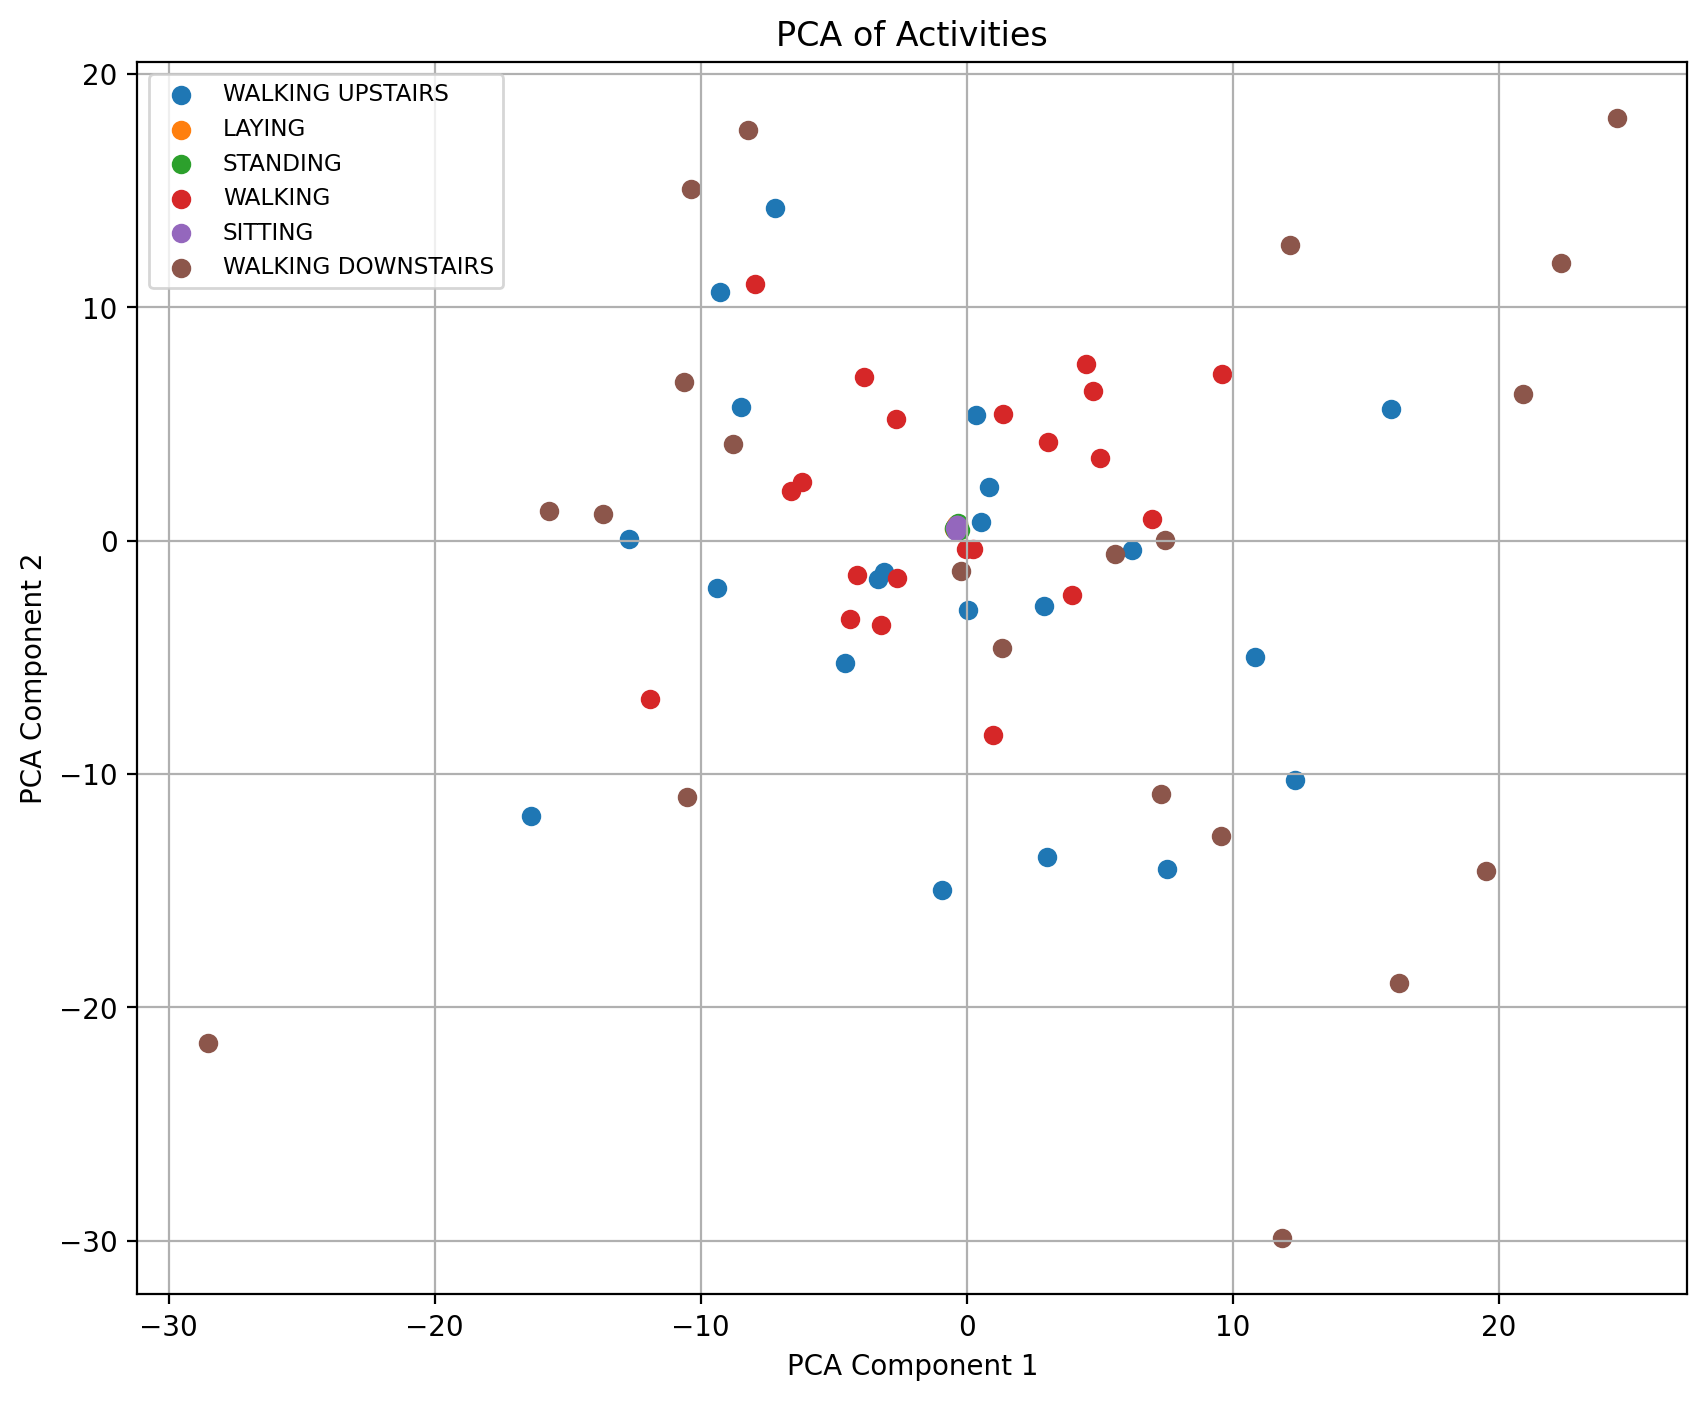

In [5]:
from HAR.MakeDataset import X_train, y_train

# accx^2 + accy^2+ accZ^2
X_train = np.square(X_train[:, :, 0]) + np.square(X_train[:, :, 1]) + np.square(X_train[:, :, 2])
y_train = np.reshape(y_train, (126, 1))
X_train_tol_acc = pd.DataFrame(X_train)
y_train_tol_acc = pd.DataFrame(y_train)
PCA_func(X_train_tol_acc.values,y_train_tol_acc)




#### Using TSFEL for feature extraction and followed by PCA

*** Feature extraction started ***



*** Feature extraction finished ***
[0 1]


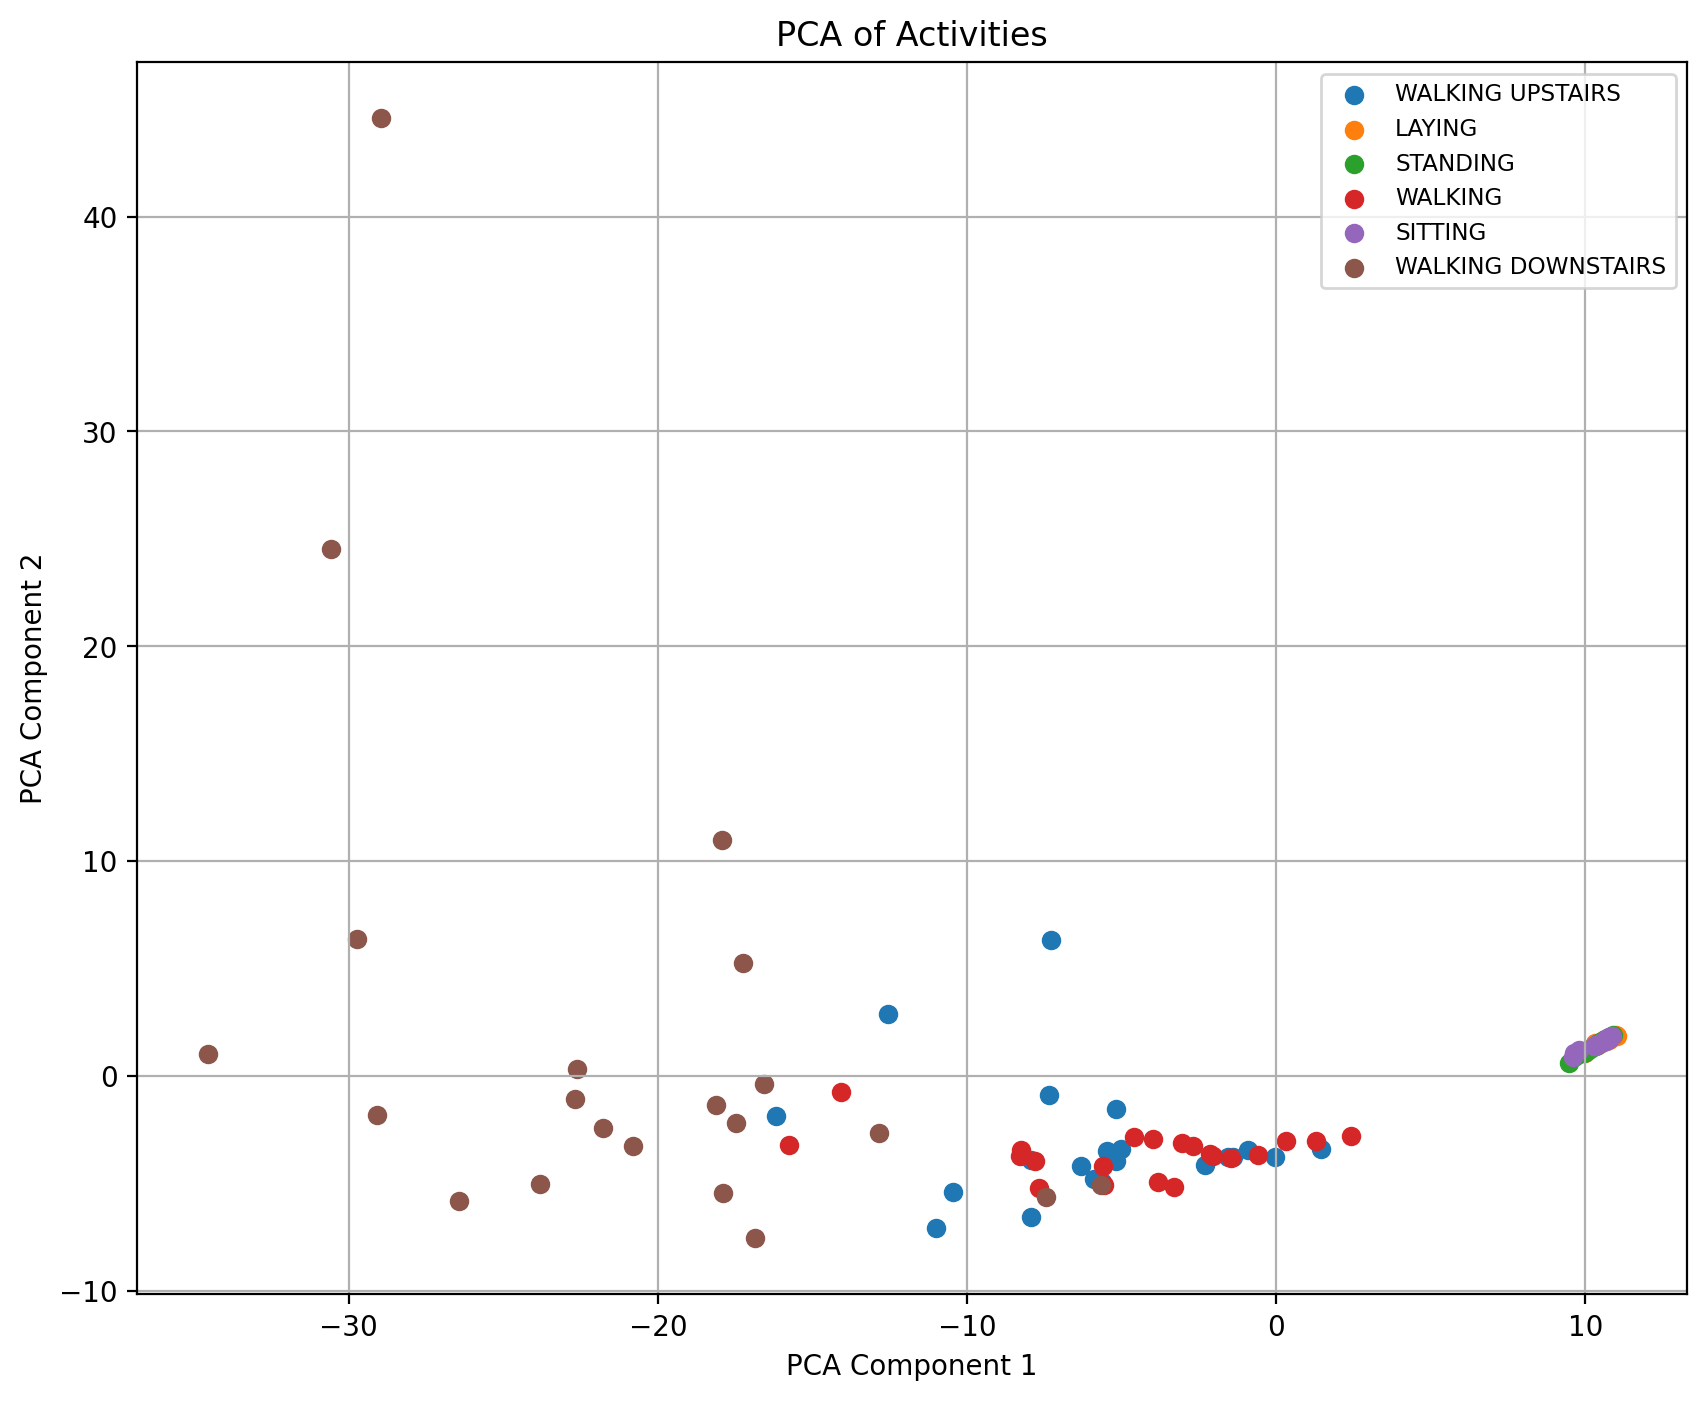

In [6]:
import tsfel

x_train_sig = list(X_train_tol_acc.to_numpy())
y_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)


cfg_file = tsfel.get_features_by_domain()  # All features
# Get features
X_train_TSFEL = tsfel.time_series_features_extractor(cfg_file, x_train_sig, fs =200 )
y_train_TSFEL = y_train_tol_acc

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train_TSFEL)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)

# Performing PCA to the TSFEL data
PCA_func(nX_train,y_train_TSFEL)


#### PCA for Features Dataset (X_train)

[0 1]


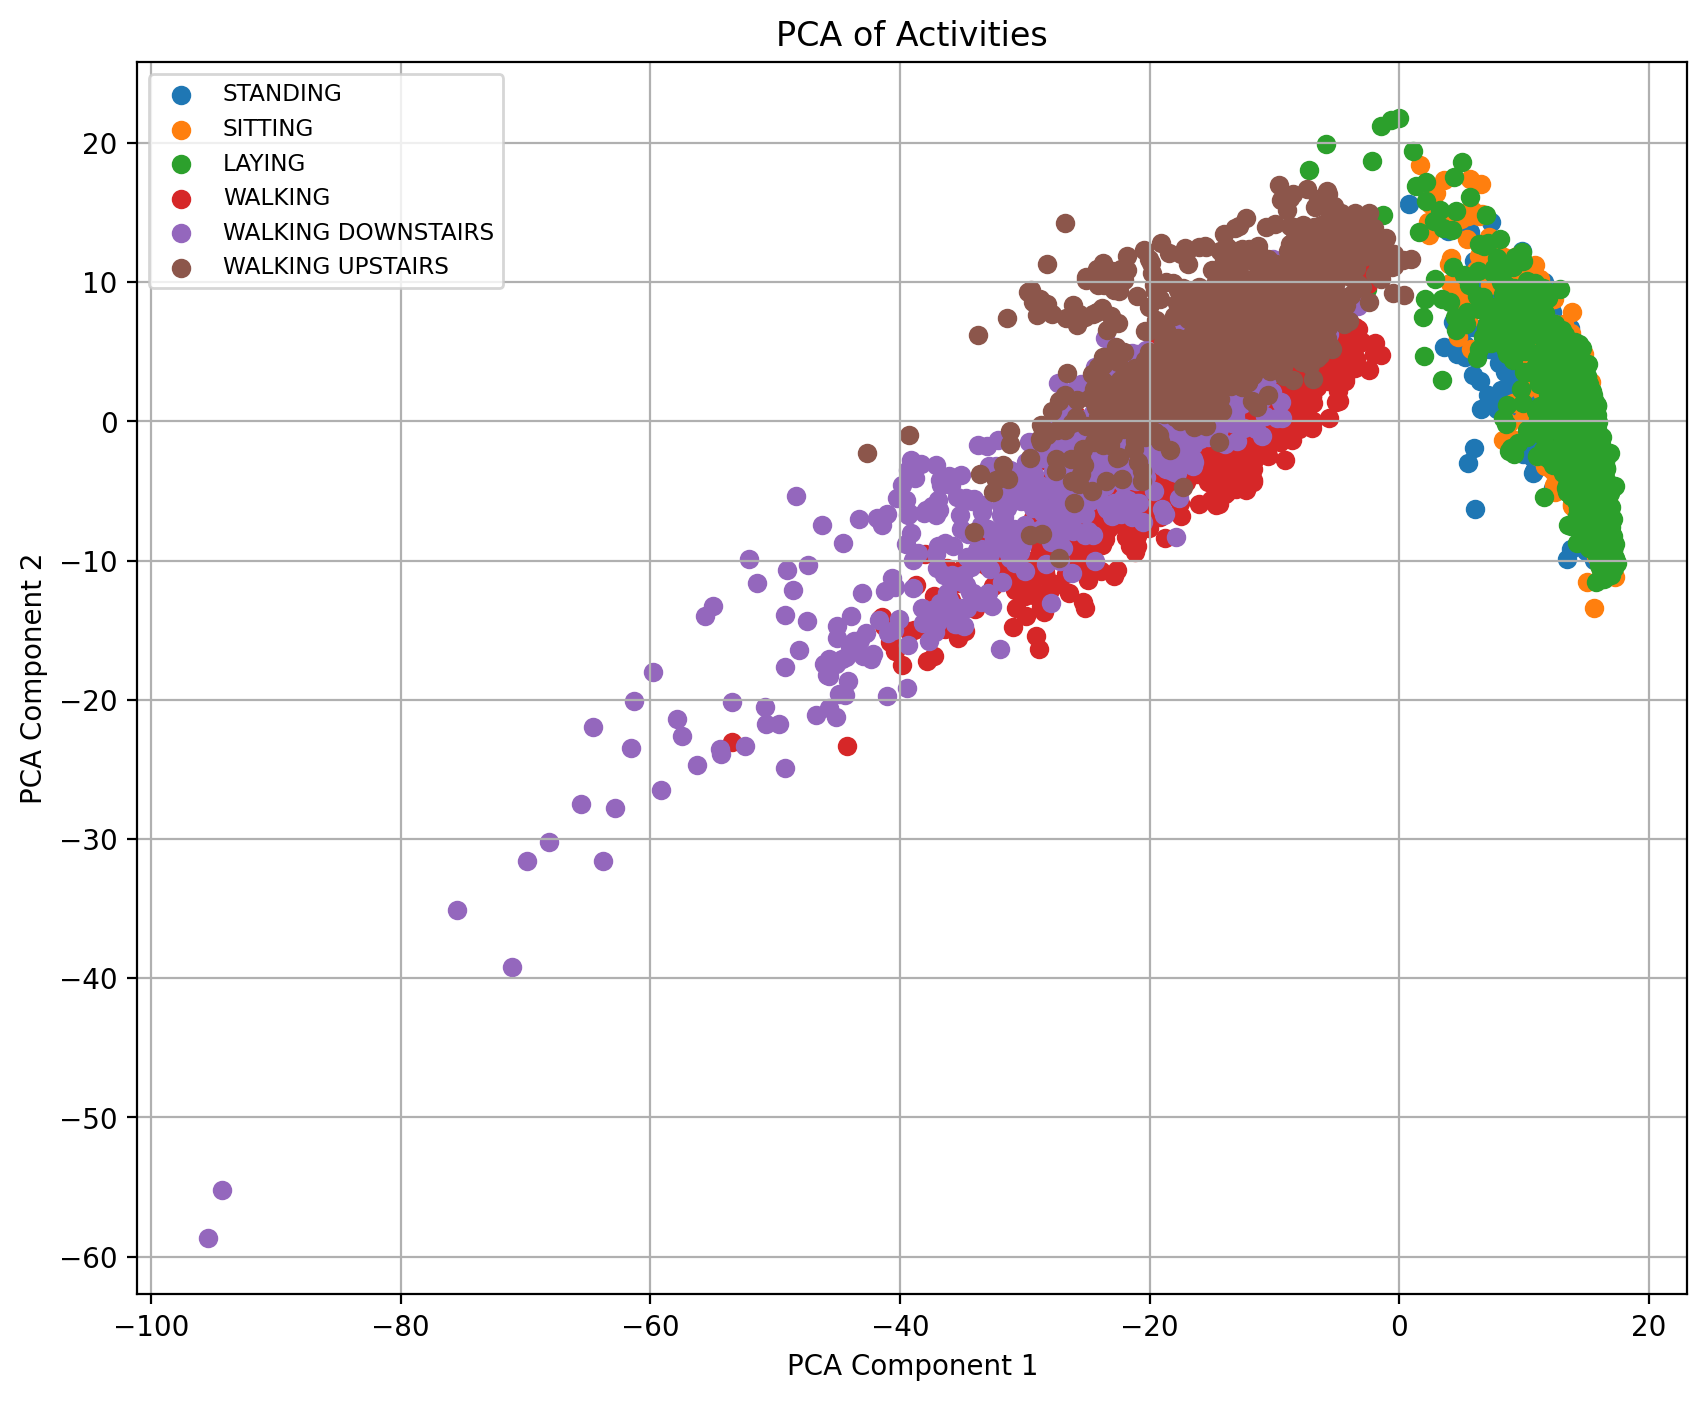

In [7]:

# Using SVD
X_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
PCA_func(X_train_df.values,y_train_df)

The results of PCA on TSFEL,features dataset are better than the Total Acceleration.
* You see the **Total Acceleration scatter plot** it is more likely spread out in the graph we can't get clusters from that plot.
* In **Features dataset scatter plot** it is able to make 2 clusters which are static and dynamic activity.
* From **TSFEL scatter plot** also we are able to get 2 clusters which are static and dynamic activity but it is able to get feature extraction also.

Both TSFEL and Features dataset plots boths methods are great for visualizing the data. But **TSFEL method** able to extract features also.

## Q4

In [8]:
X_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "X_train.txt"), sep='\s+', header=None)
y_train_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset/train", "y_train.txt"), sep='\s+', header=None)
column_names_df = pd.read_csv(os.path.join("./HAR/UCI HAR Dataset", "features.txt"), sep='\s+', header=None, usecols=[1], index_col=False)
column_names = column_names_df[1].tolist()
X_train_df.columns = column_names
def Corr_matrix_and_reductant_features(X_train_corr_matrix,dataset_name):
    # Defining the threshold for high correlation
    threshold = 0.9

    # Identifing pairs of highly correlated features
    high_corr_pairs = []

    # Iterating through the correlation matrix
    for i in range(X_train_corr_matrix.shape[0]):
        for j in range(i+1, X_train_corr_matrix.shape[1]):
            if abs(X_train_corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((X_train_corr_matrix.index[i], X_train_corr_matrix.columns[j], X_train_corr_matrix.iloc[i, j]))

    high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

    print(f'No of Highly correlated or Reductant feature pairs for {dataset_name} : {high_corr_df.shape[0]}')


#Correlation matrix for X_train(Feature dataset)
X_train_corr_matrix = X_train_df.corr()
Corr_matrix_and_reductant_features(X_train_corr_matrix,'X_train (Feature dataset)')
TSFEL_corr_matrix = X_train_TSFEL.corr()
Corr_matrix_and_reductant_features(TSFEL_corr_matrix, 'TSFEL dataset')



No of Highly correlated or Reductant feature pairs for X_train (Feature dataset) : 8206
No of Highly correlated or Reductant feature pairs for TSFEL dataset : 1695
